# Basic Data Exploration

In [282]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [283]:
# Loading Dataset

filepath = "/kaggle/input/telecom-churn/telecom_churn.csv"
df = pd.read_csv(filepath)

In [284]:
# Looking at the data

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [285]:
# Exploring Dataset to find Null values count and dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


There is no Null values in any column

In [286]:
# Getting a closer look on numerical columns

df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Key takeouts
* **Churn rate is about 14.49%**
* **Only about 27.66% of users has data plan**
* Users made up to 9 customer service calls
* Users pay up to 111 dollars per month
* At least 75% of users pay overage fee

In [287]:
# Creating churn and data plan categories

df_cat = df.copy()

for cat_col in ["Churn", "DataPlan"]:
    df_cat[cat_col] = list("Yes" if data == 1 else "No" for data in df_cat[cat_col])
    df_cat[cat_col] = df_cat[cat_col].astype("category")

# Exploratory Data Analysis

<Axes: >

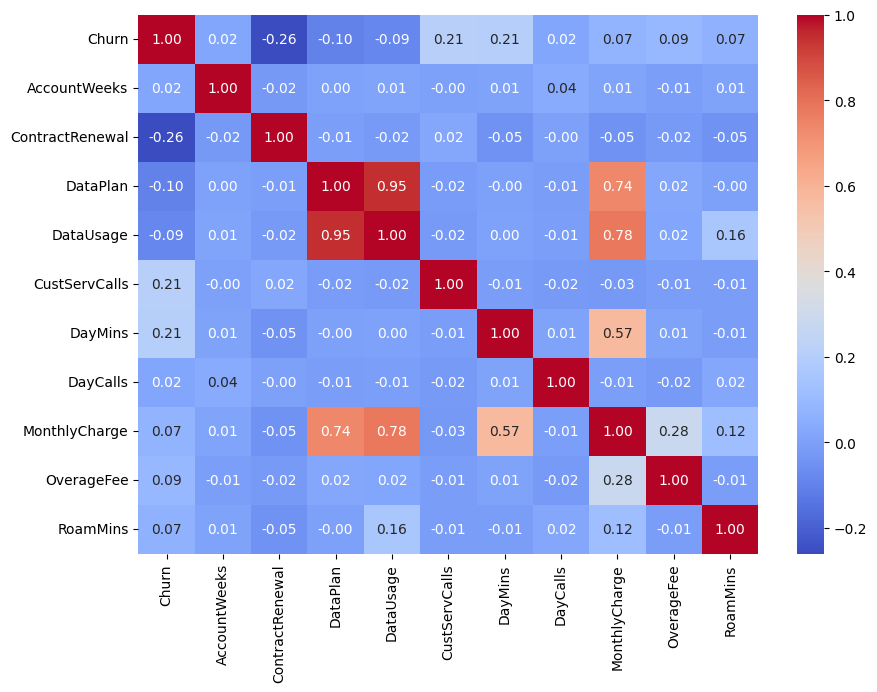

In [288]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), fmt=".2f", annot=True, cmap="coolwarm")

Key Correlations:
* Churn is negatively correlated with ContractRenewal, which means that customers that recently renewed contract are less likely to churn
* Churn is positively correlated with number of customer service calls, and daily minutes. Thus, the more customer service calls, and the more minutes spend on calling, the more customer is likely to churn
* Amount of monthly charge has high positive correlation with data plan and data usage. Correlation is almost the same for both variables, so it seems like customers which pay the most are the ones which also use internet, and have data plan. However, monthly charge is also correlated with minutes spend on calling, amount of overage fee, and slightly with minutes spend on calling via roaming

Notes:
* Monthly charge, data usage, and data plan being correlated seems pretty clear. Those on data plan pay a bit more cause of this plan, and they have a data plan, because they use internet. However, there could be customers who, somehow, have a data plan, but don't use the internet, and don't know about it, causing them to churn because of high monthly charge
* Monthly charge correlated with daily minutes is also pretty clear, because it is natural that customers which call more also pay more. However, it needs to be checked, because they could also pay too much for those minutes (and it could be the case both ways: customers could pay too much when they call frequently, but the same way they could pay too much when they almost don't call at all)
* Also, high monthly charge in addition with high overage fee could be too much for some customers. Possibly it could be caused by daily minutes and roaming minutes
* More customers service calls could be an indication of customer churning

In [289]:
# Creating a list with only significant continuus numerical variables 

vars_cont = [
    "DataUsage",
    "DayMins",
    "MonthlyCharge",
    "OverageFee",
    "RoamMins"
]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be chan

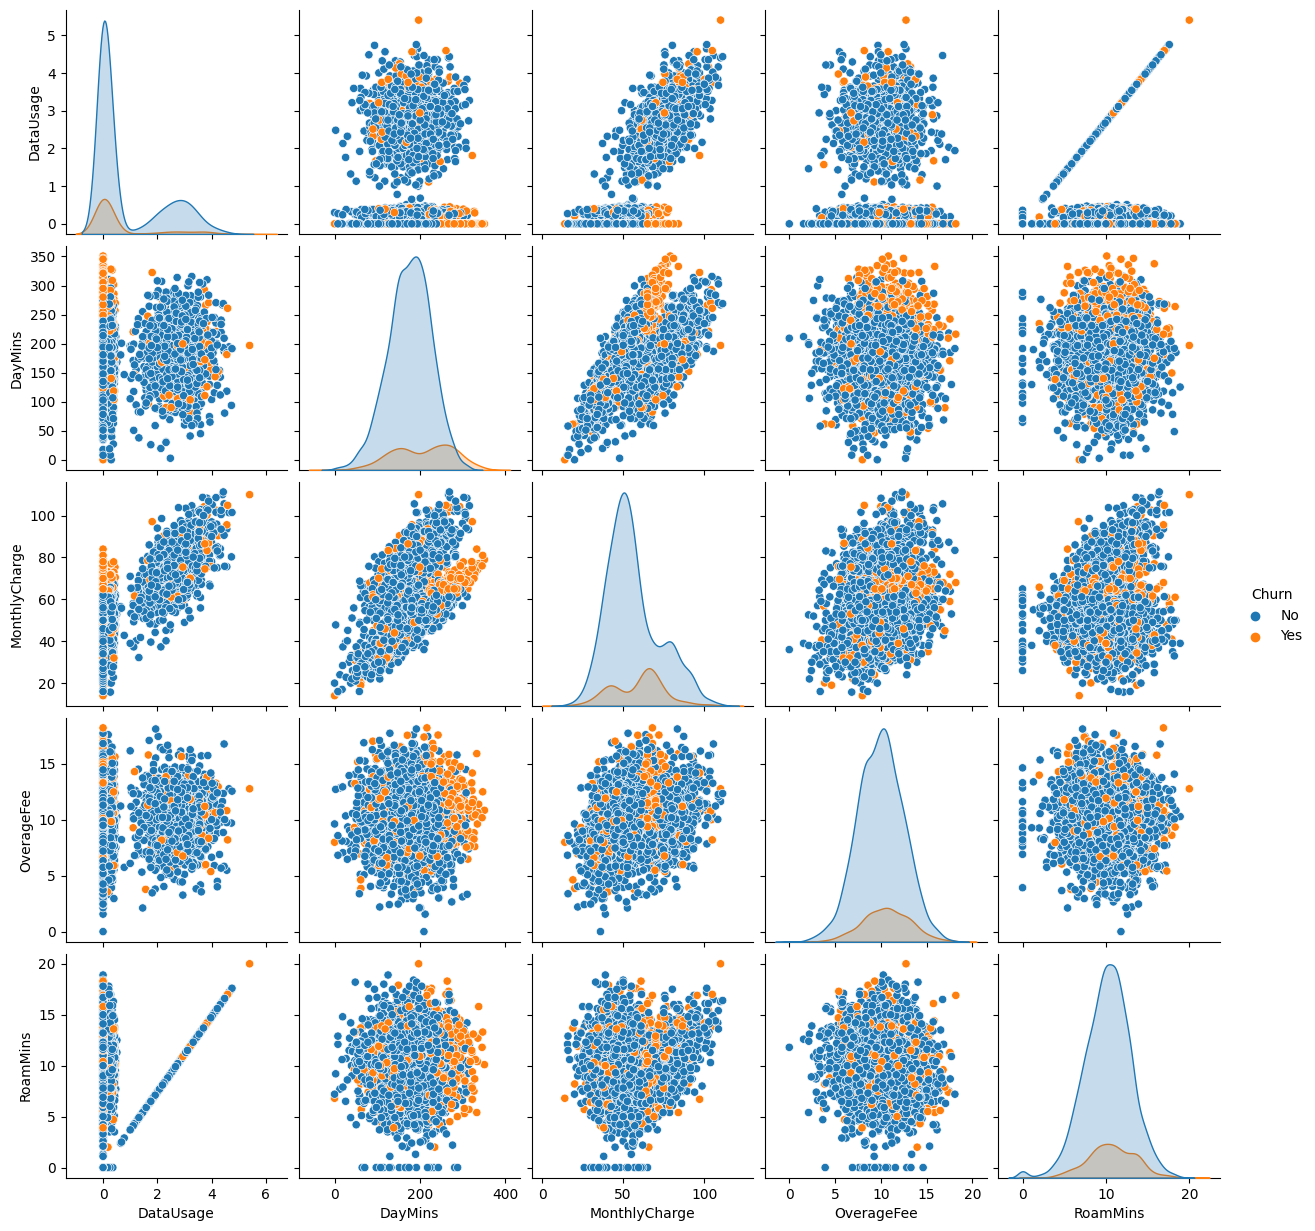

In [290]:
# Exploring relations of significant continuus numerical variables 

sns.pairplot(data=df_cat,
             vars=vars_cont,
             hue="Churn")

In [291]:
# Creating list of significant numeric variables by adding customer service calls to significant continuus variables list

vars_num = vars_cont
vars_num.append("CustServCalls")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

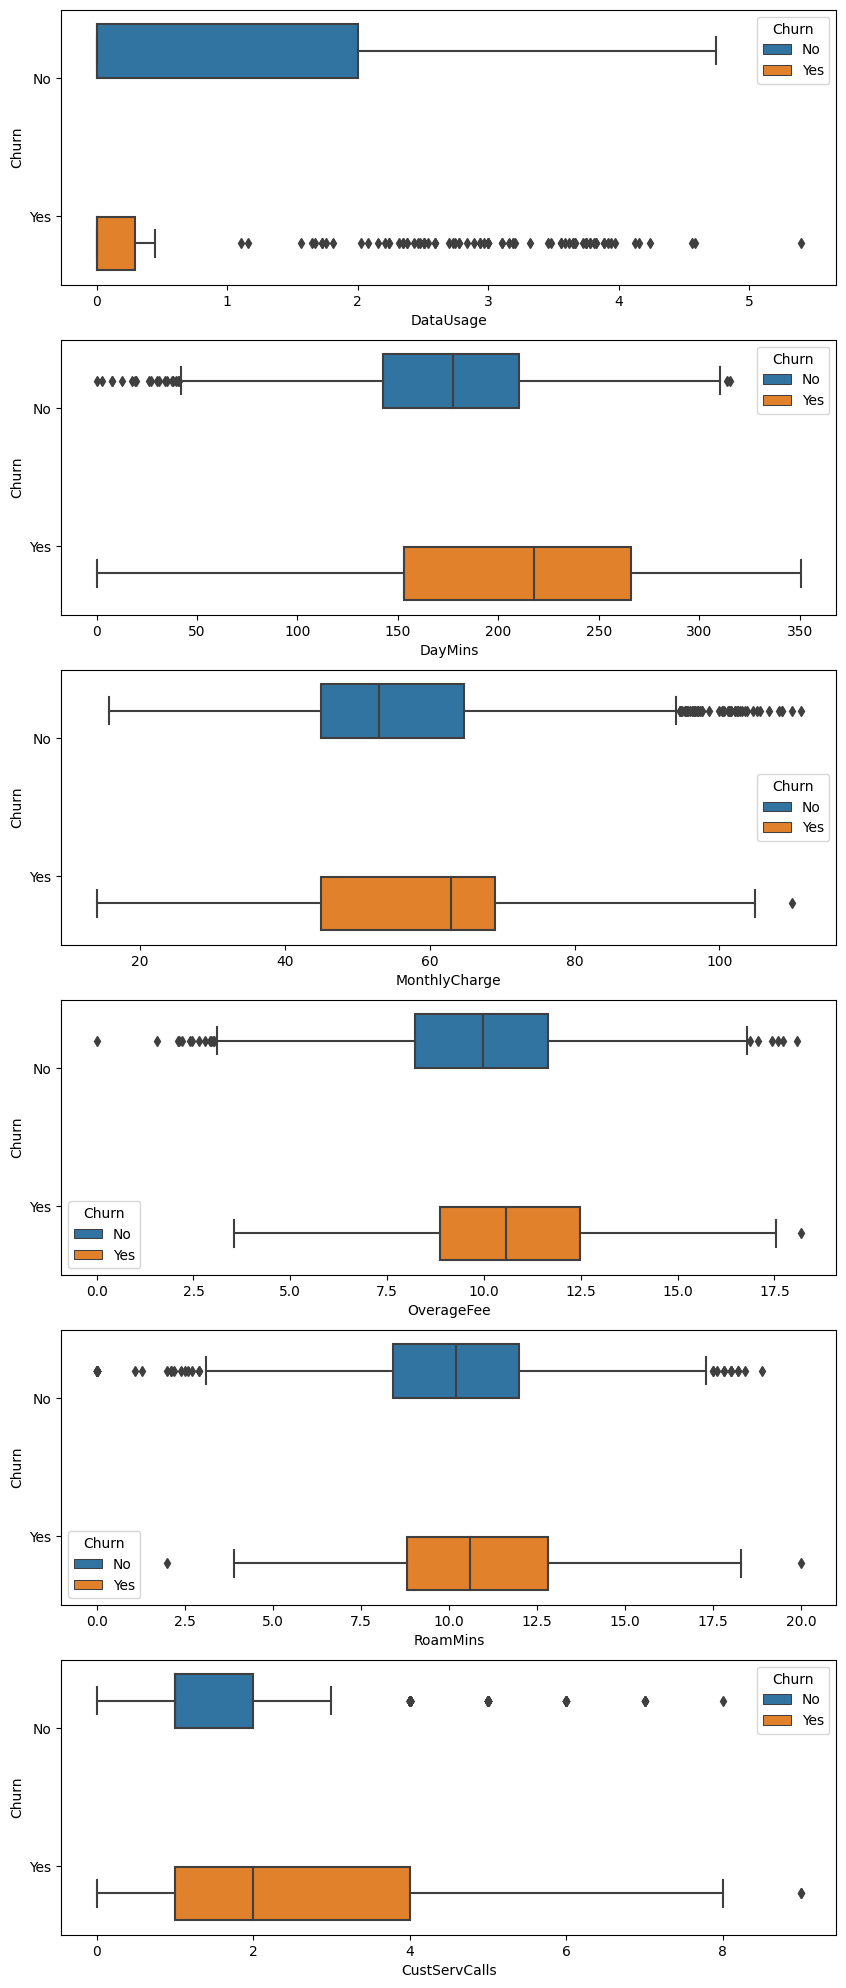

In [292]:
# Exploring the distribution of significant numeric variables for churn and not churn customers

fig, ax = plt.subplots(len(vars_num), 1, figsize=(10, 25))

for i, var in enumerate(vars_num):
    sns.boxplot(data=df_cat, y="Churn", x=var, hue="Churn", ax=ax[i])

## Key takeouts

* Most churn customers have 0 GB of data usage
* Churn customers pay a bit higher monthly charge and have more daily minutes 
* There is a clear cluster of churn customers that on average have more than 200 daily minutes, pay more than 60$ of monthly charge, and have 0 GB of data usage
* Churn customers seems to have bigger number of customer service calls

## Questions to answer

* How big is a churn rate between customers with data plan, and without?
* What number of customer service calls signals that a customer is more likely to churn?

## Q1: How big is a churn rate between customers with data plan, and without?

Churn rate for customers without data plan **is almost 2 times bigger** (16.72%) than for customers with data plan (8.68%).

Text(0.5, 1.0, '# of customers churning with and without data plan')

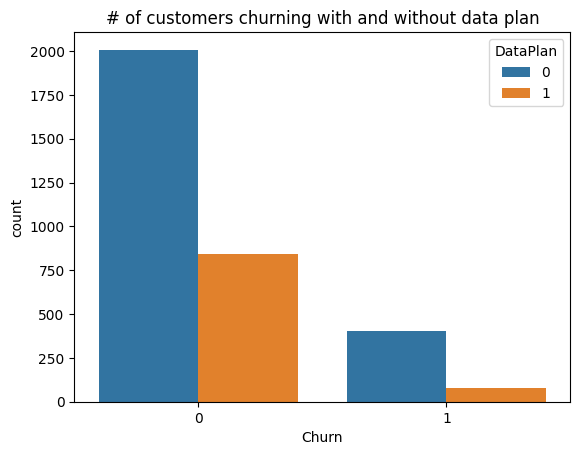

In [293]:
plan_hist = sns.countplot(data=df, x="Churn", hue="DataPlan")
plan_hist.set_title("# of customers churning with and without data plan")

In [294]:
plan_df = df[df["DataPlan"] == 1]
no_plan_df = df[df["DataPlan"] == 0]

churn_rate_plan = np.sum(plan_df["Churn"]) / len(plan_df["Churn"])
churn_rate_no_plan = np.sum(no_plan_df["Churn"]) / len(no_plan_df["Churn"])

print(f"Churn Rate for cust. with plan   :   {round(churn_rate_plan * 100, 2)}%")
print(f"Churn Rate for cust. without plan   :   {round(churn_rate_no_plan * 100, 2)}%")

Churn Rate for cust. with plan   :   8.68%
Churn Rate for cust. without plan   :   16.72%


## Q2: What number of customer service calls signals that a customer is more likely to churn?

Looking at the data, we can split number of service calls into 3 groups:
* 0-3 customer calls: in this group customers are very likely to stay
* 4 customer calls: in this group customers are almost equally likely to stay and churn
* 5 and more customer calls: **in this group customers are more likely to churn than to stay**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '# of customers against number of service calls')

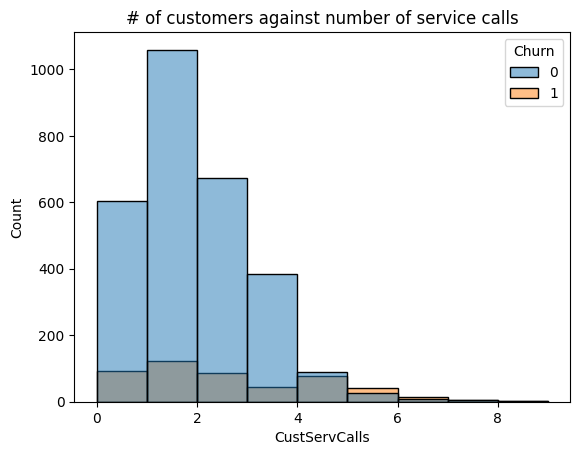

In [295]:
calls_hist = sns.histplot(data=df, x="CustServCalls", hue="Churn", binwidth=1)
calls_hist.set_title("# of customers against number of service calls")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '# of customers against number of service calls, 4+ calls only')

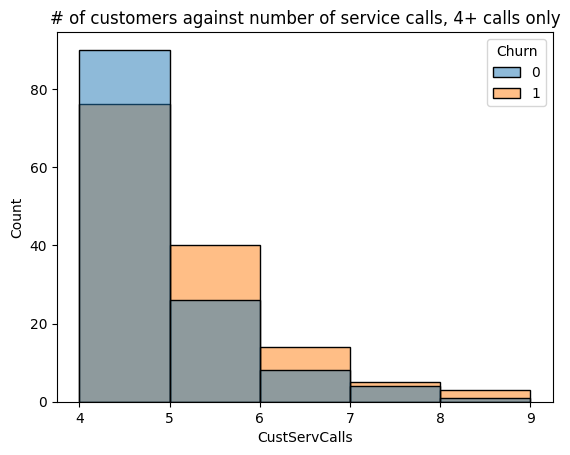

In [296]:
# Getting closer look on customers who've made 4+ service calls

calls_hist_close = sns.histplot(data=df[df["CustServCalls"] >= 4],
             x="CustServCalls",
             hue="Churn",
             binwidth=1)
calls_hist_close.set_title("# of customers against number of service calls, 4+ calls only")

# Model preprocessing

In [297]:
df = df[["Churn","DayMins", "MonthlyCharge", "OverageFee", "DataPlan", "CustServCalls", "DataUsage", "ContractRenewal"]]

In [298]:
X = df.drop(columns=["Churn"])
y = df.loc[:, "Churn"]

In [299]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=22
)

In [300]:
X_y_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis = 1)

In [301]:
X_y_train.head()

,DayMins,MonthlyCharge,OverageFee,DataPlan,CustServCalls,DataUsage,ContractRenewal,Churn
0,117.3,38.0,10.44,0,2,0.00,1,0
1,148.2,39.0,7.98,0,2,0.00,0,0
2,186.8,47.0,8.69,0,2,0.00,1,0
3,119.1,49.2,14.39,0,0,0.42,1,0
4,168.2,43.0,8.09,0,3,0.00,1,0


In [302]:
churned_X_y = X_y_train[X_y_train["Churn"] == 1]

In [303]:
not_churned_X_y = X_y_train[X_y_train["Churn"] == 0]

In [304]:
X_y_train["Churn"].value_counts()

Churn
0    2283
1     383
Name: count, dtype: int64

In [305]:
count_not_churned, count_churned = X_y_train["Churn"].value_counts()

In [306]:
not_churned_sample_X_y = not_churned_X_y.sample(n=count_churned)

In [307]:
X_y_train_under = pd.concat([churned_X_y, not_churned_sample_X_y], axis = 0)

In [308]:
scaler = MinMaxScaler()

In [309]:
X_train = X_y_train_under.drop(columns=["Churn"])

In [310]:
X_train = scaler.fit_transform(X_train)

In [311]:
X_test = scaler.fit_transform(X_test)

In [312]:
y_train = X_y_train_under.loc[:, "Churn"]

# KNN Model

In [313]:
train_accuracies = {}
test_accuracies = {}

In [314]:
neighbors = np.arange(2, 30, 1)

In [315]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

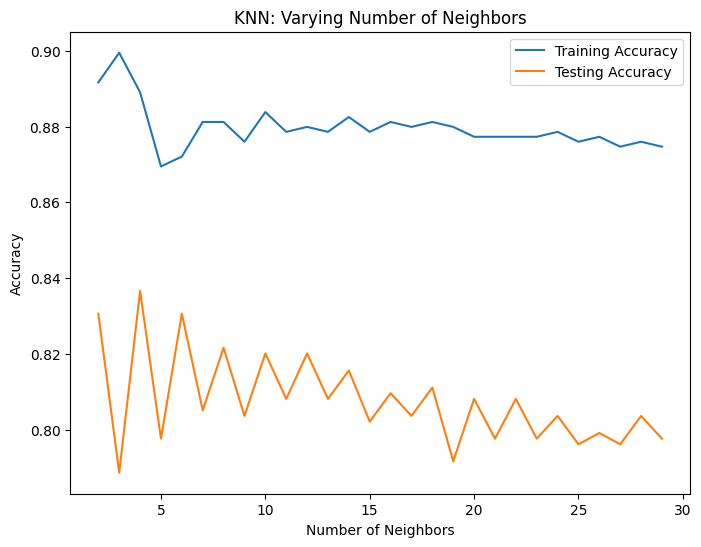

In [316]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [317]:
kf_knn = KFold(n_splits=4, shuffle=True, random_state=22)

In [318]:
best_knn = KNeighborsClassifier(n_neighbors=4)

In [319]:
cv_score_knn = cross_val_score(best_knn, X_train, y_train, cv=kf_knn)

In [320]:
print(cv_score_knn)

[0.80729167 0.84895833 0.84293194 0.80628272]


In [321]:
print(f"Mean cross validation score for KNN: {np.mean(cv_score_knn).round(3)}")
print(f"Standard deviation across cross validation scores for KNN: {np.std(cv_score_knn, ddof=0).round(3)}")

Mean cross validation score for KNN: 0.826
Standard deviation across cross validation scores for KNN: 0.02


In [322]:
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [323]:
y_pred_knn = best_knn.predict(X_test)

In [324]:
best_knn.score(X_test, y_test)

0.8365817091454273

In [325]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

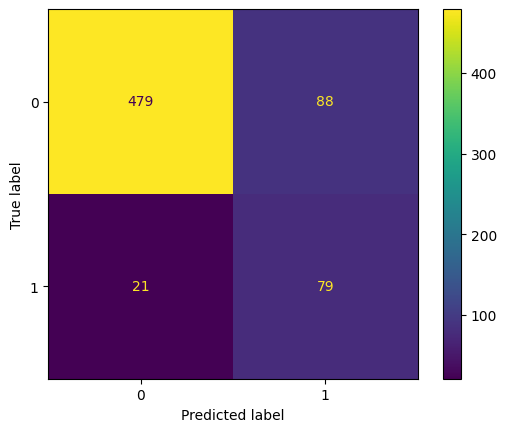

In [326]:
ConfusionMatrixDisplay(knn_cm).plot()

In [327]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       567
           1       0.47      0.79      0.59       100

    accuracy                           0.84       667
   macro avg       0.72      0.82      0.74       667
weighted avg       0.89      0.84      0.85       667



In [328]:
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

In [329]:
auc_knn = roc_auc_score(y_test, y_proba_knn)

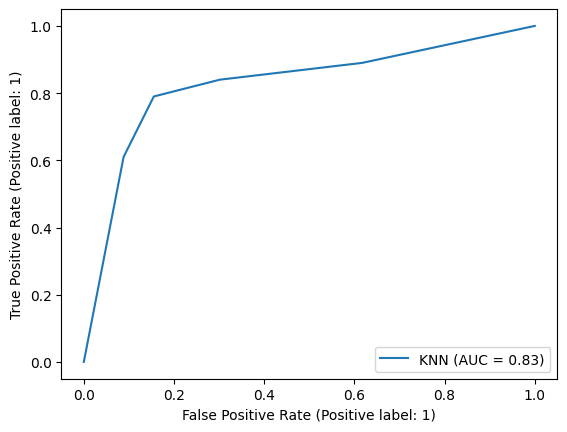

In [330]:
RocCurveDisplay.from_predictions(y_test, y_proba_knn, name="KNN")

# Logistic Regression

In [331]:
params_log = {
    "C": np.linspace(0.01, 100, 10),
    "penalty": ["l1", "l2"],
    "random_state": [22]
}

In [332]:
kf_log = KFold(n_splits=4, shuffle=True, random_state=22)

In [333]:
grid_log = GridSearchCV(estimator=LogisticRegression(), param_grid=params_log, cv=kf_log, scoring="accuracy")

In [334]:
grid_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.000e-02, 1.112e+01, 2.223e+01, 3.334e+01, 4.445e+01, 5.556e+01,
       6.667e+01, 7.778e+01, 8.889e+01, 1.000e+02]),
                         'penalty': ['l1', 'l2'], 'random_state': [22]},
             scoring='accuracy')

In [335]:
grid_log.best_params_

{'C': 22.23, 'penalty': 'l2', 'random_state': 22}

In [336]:
grid_log.best_score_

0.7493182809773123

In [337]:
best_log = grid_log.best_estimator_

In [338]:
best_log.score(X_test, y_test)

0.7091454272863568

In [339]:
cm_log = confusion_matrix(y_test, best_log.predict(X_test))

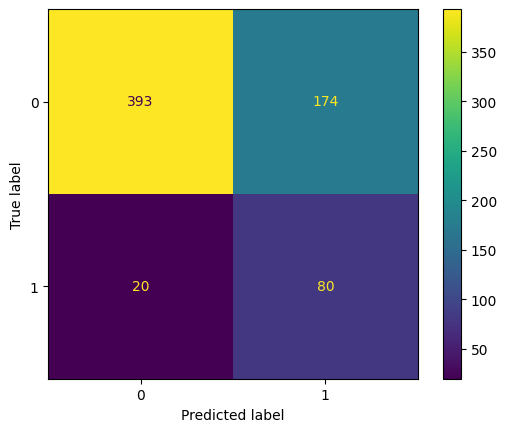

In [340]:
ConfusionMatrixDisplay(cm_log).plot()

In [341]:
df_log = pd.DataFrame(grid_log.cv_results_)

In [342]:
cv_score_log = [df_log[df_log["params"] == grid_log.best_params_][f"split{i}_test_score"].max() for i in range(4)]

In [343]:
cv_score_log

[0.7291666666666666, 0.7916666666666666, 0.7329842931937173, 0.743455497382199]

In [344]:
print(classification_report(y_test, best_log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       567
           1       0.31      0.80      0.45       100

    accuracy                           0.71       667
   macro avg       0.63      0.75      0.63       667
weighted avg       0.86      0.71      0.75       667



In [345]:
y_proba_log = best_log.predict_proba(X_test)[:, 1]

In [346]:
auc_log = roc_auc_score(y_test, y_proba_log)

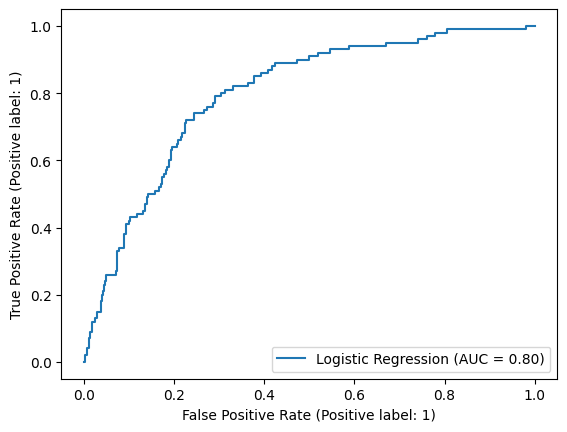

In [347]:
RocCurveDisplay.from_predictions(y_test, y_proba_log, name="Logistic Regression")

In [348]:
print(f"Mean cross validation score for Logistic Regression: {np.mean(cv_score_log).round(3)}")
print(f"Standard deviation across cross validation scores for Logistic Regression: {np.std(cv_score_log, ddof=0).round(3)}")

Mean cross validation score for Logistic Regression: 0.749
Standard deviation across cross validation scores for Logistic Regression: 0.025


# Support Vector Machine

In [349]:
params_svc = {
    "degree": [1, 2],
    "C": np.linspace(0.01, 100, 15),
    "gamma": np.linspace(0.0001, 100, 15),
    "random_state": [22],
    "probability": [True]
}

In [350]:
kf_svc = KFold(n_splits=4, shuffle=True, random_state=22)

In [351]:
grid_svc = GridSearchCV(estimator=SVC(), param_grid=params_svc, cv=kf_svc, scoring="accuracy")

In [352]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.00000000e-02, 7.15214286e+00, 1.42942857e+01, 2.14364286e+01,
       2.85785714e+01, 3.57207143e+01, 4.28628571e+01, 5.00050000e+01,
       5.71471429e+01, 6.42892857e+01, 7.14314286e+01, 7.85735714e+01,
       8.57157143e+01, 9.28578571e+01, 1.00000000e+02]),
                         'degree': [1, 2],
                         'gamma': array([1.000000e-04, 7.142950e+00, 1.428580e+01, 2.142865e+01,
       2.857150e+01, 3.571435e+01, 4.285720e+01, 5.000005e+01,
       5.714290e+01, 6.428575e+01, 7.142860e+01, 7.857145e+01,
       8.571430e+01, 9.285715e+01, 1.000000e+02]),
                         'probability': [True], 'random_state': [22]},
             scoring='accuracy')

In [353]:
grid_svc.best_params_

{'C': 7.152142857142857,
 'degree': 1,
 'gamma': 7.14295,
 'probability': True,
 'random_state': 22}

In [354]:
grid_svc.best_score_

0.8576843368237348

In [355]:
best_svc = grid_svc.best_estimator_

In [356]:
best_svc.score(X_test, y_test)

0.8335832083958021

In [357]:
cm_svc = confusion_matrix(y_test, best_svc.predict(X_test))

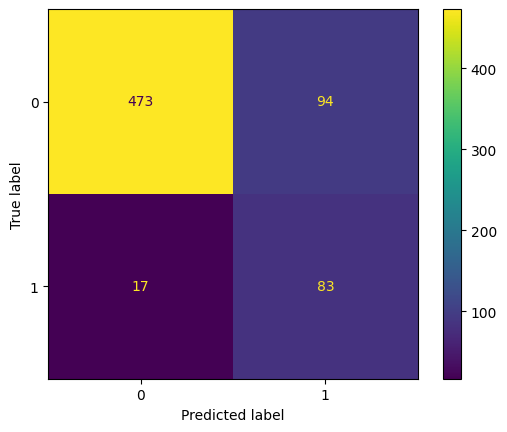

In [358]:
ConfusionMatrixDisplay(cm_svc).plot()

In [359]:
df_svc = pd.DataFrame(grid_svc.cv_results_)

In [360]:
cv_score_svc = [df_svc[df_svc["params"] == grid_svc.best_params_][f"split{i}_test_score"].max() for i in range(4)]

In [361]:
cv_score_svc

[0.8489583333333334,
 0.8802083333333334,
 0.8691099476439791,
 0.8324607329842932]

In [362]:
print(classification_report(y_test, best_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       567
           1       0.47      0.83      0.60       100

    accuracy                           0.83       667
   macro avg       0.72      0.83      0.75       667
weighted avg       0.89      0.83      0.85       667



In [363]:
y_proba_svc = best_svc.predict_proba(X_test)[:, 1]

In [364]:
auc_svc = roc_auc_score(y_test, y_proba_svc)

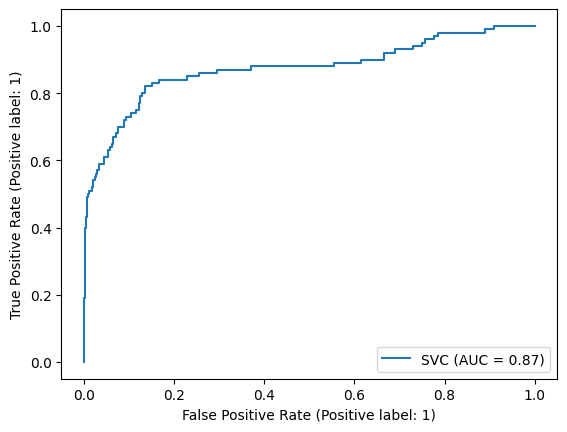

In [365]:
RocCurveDisplay.from_predictions(y_test, y_proba_svc, name="SVC")

In [366]:
print(f"Mean cross validation score for SVC: {np.mean(cv_score_svc).round(3)}")
print(f"Standard deviation across cross validation scores for SVC: {np.std(cv_score_svc, ddof=0).round(3)}")

Mean cross validation score for SVC: 0.858
Standard deviation across cross validation scores for SVC: 0.018


# Decision Tree

In [367]:
params_rf = {
    "random_state": [22],
    "max_depth": [5, 10, 15],
    "min_samples_leaf": np.arange(0.01, 0.05, 0.01),
    "n_estimators": [100, 300, 600]
}

In [368]:
kf_rf = KFold(n_splits=4, shuffle=True, random_state=22)

In [369]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf, cv=kf_rf, scoring="accuracy")

In [370]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04]),
                         'n_estimators': [100, 300, 600],
                         'random_state': [22]},
             scoring='accuracy')

In [371]:
grid_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 0.01,
 'n_estimators': 100,
 'random_state': 22}

In [372]:
best_rf = grid_rf.best_estimator_

In [373]:
grid_rf.best_score_

0.8668057373472949

In [374]:
best_rf.score(X_test, y_test)

0.8185907046476761

In [375]:
df_rf = pd.DataFrame(grid_rf.cv_results_)

In [376]:
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test))

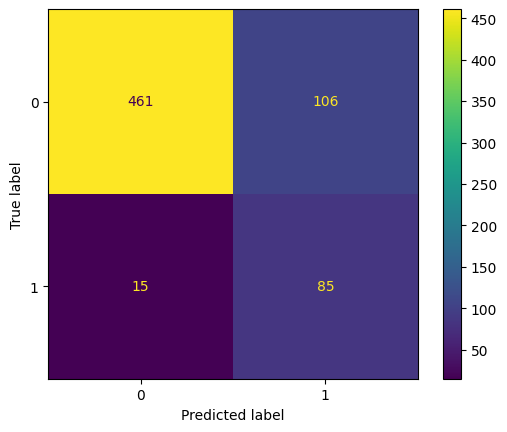

In [377]:
ConfusionMatrixDisplay(cm_rf).plot()

In [378]:
cv_score_rf = [df_rf[df_rf["params"] == grid_rf.best_params_][f"split{i}_test_score"].max() for i in range(4)]

In [379]:
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       567
           1       0.45      0.85      0.58       100

    accuracy                           0.82       667
   macro avg       0.71      0.83      0.73       667
weighted avg       0.89      0.82      0.84       667



In [380]:
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [381]:
auc_rf = roc_auc_score(y_test, y_proba_rf)

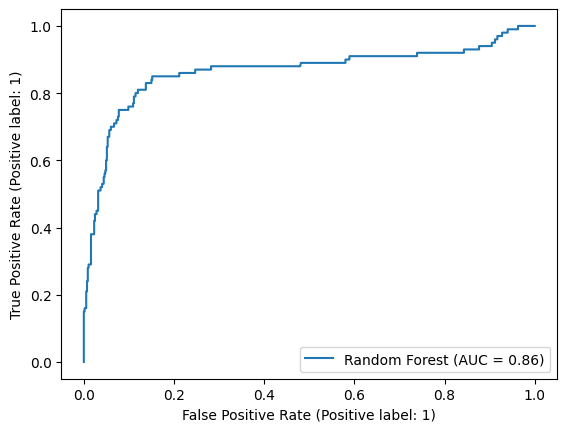

In [382]:
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest")

In [383]:
print(f"Mean cross validation score for Random Forest: {np.mean(cv_score_rf).round(3)}")
print(f"Standard deviation across cross validation scores for Random Forest: {np.std(cv_score_rf, ddof=0).round(3)}")

Mean cross validation score for Random Forest: 0.871
Standard deviation across cross validation scores for Random Forest: 0.008


# Voting Classifier

In [384]:
classifiers = [
    ("KNNeighbors", best_knn),
    ("RandomForest", best_rf),
    ("SVC", best_svc)
]

In [385]:
param_grid_cv = {
    "voting": ["soft"],
    "weights": [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (3, 2, 2), (2, 3, 2), (2, 2, 3)]
}

In [386]:
vc = VotingClassifier(estimators=classifiers)

In [387]:
kf_vc = KFold(n_splits=4, shuffle=True, random_state=22)

In [388]:
grid_vc = GridSearchCV(estimator=vc, param_grid=param_grid_cv, cv=kf_vc)

In [389]:
grid_vc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
             estimator=VotingClassifier(estimators=[('KNNeighbors',
                                                     KNeighborsClassifier(n_neighbors=4)),
                                                    ('RandomForest',
                                                     RandomForestClassifier(max_depth=5,
                                                                            min_samples_leaf=0.01,
                                                                            random_state=22)),
                                                    ('SVC',
                                                     SVC(C=7.152142857142857,
                                                         degree=1,
                                                         gamma=7.14295,
                                                         probability=True,
                                                         random_state=22))]),
             param_grid={'voting': ['soft'],
                         'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2),
                                     (3, 2, 2), (2, 3, 2), (2, 2, 3)]})

In [390]:
grid_vc.best_params_

{'voting': 'soft', 'weights': (1, 2, 1)}

In [391]:
grid_vc.best_score_

0.8642015706806283

In [392]:
best_vc = grid_vc.best_estimator_

In [393]:
best_vc.score(X_test, y_test)

0.8215892053973014

In [394]:
cm_vc = confusion_matrix(y_test, best_vc.predict(X_test))

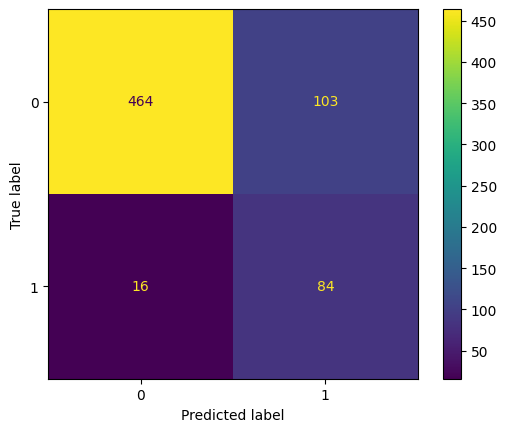

In [395]:
ConfusionMatrixDisplay(cm_vc).plot()

In [396]:
print(classification_report(y_test, best_vc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       567
           1       0.45      0.84      0.59       100

    accuracy                           0.82       667
   macro avg       0.71      0.83      0.74       667
weighted avg       0.89      0.82      0.84       667



In [397]:
y_proba_vc = best_vc.predict_proba(X_test)[:, 1]

In [398]:
auc_vc = roc_auc_score(y_test, y_proba_vc)

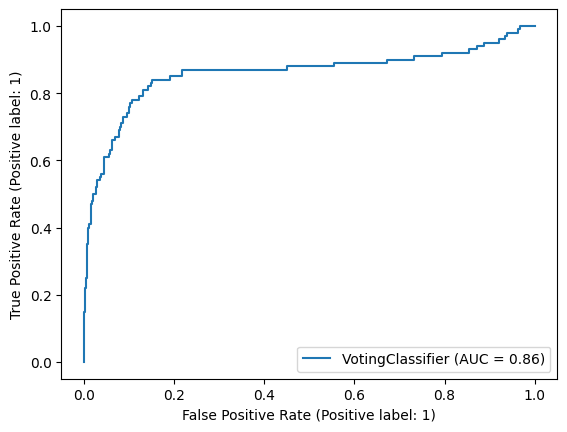

In [399]:
RocCurveDisplay.from_predictions(y_test, y_proba_vc, name="VotingClassifier")

In [400]:
df_vc = pd.DataFrame(grid_vc.cv_results_)

In [401]:
cv_score_vc = [df_vc[df_vc["params"] == grid_vc.best_params_][f"split{i}_test_score"].max() for i in range(4)]

In [402]:
print(f"Mean cross validation score for Voting Classifier: {np.mean(cv_score_vc).round(3)}")
print(f"Standard deviation across cross validation scores for Voting Classifier: {np.std(cv_score_vc, ddof=0).round(3)}")

Mean cross validation score for Voting Classifier: 0.864
Standard deviation across cross validation scores for Voting Classifier: 0.021
